Reference:   

- [DAT4](https://github.com/justmarkham/DAT4)
- [DAT5](https://github.com/justmarkham/DAT5)
- [DAT7](https://github.com/justmarkham/DAT7)
- [DAT8](https://github.com/justmarkham/DAT8)

In [1]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from patsy.contrasts import Treatment

%matplotlib inline

# 1. Example: Advertising Data

In [2]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 4)

# 2. Visualize Data

visualize the relationship between the features and the response using scatterplots

## 2.1 Plots in Pandas

### 2.1.1 scatter plot in Pandas

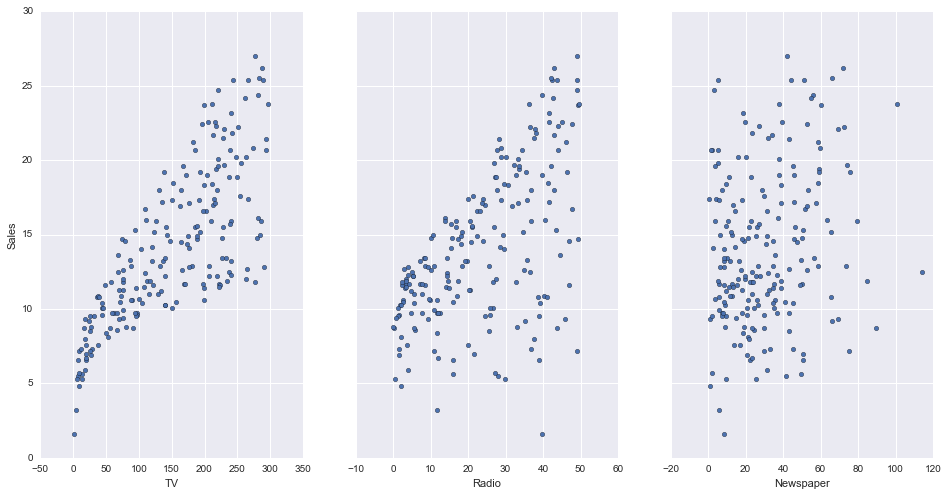

In [4]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2]);

### 2.1.2 scatter matrix in Pandas

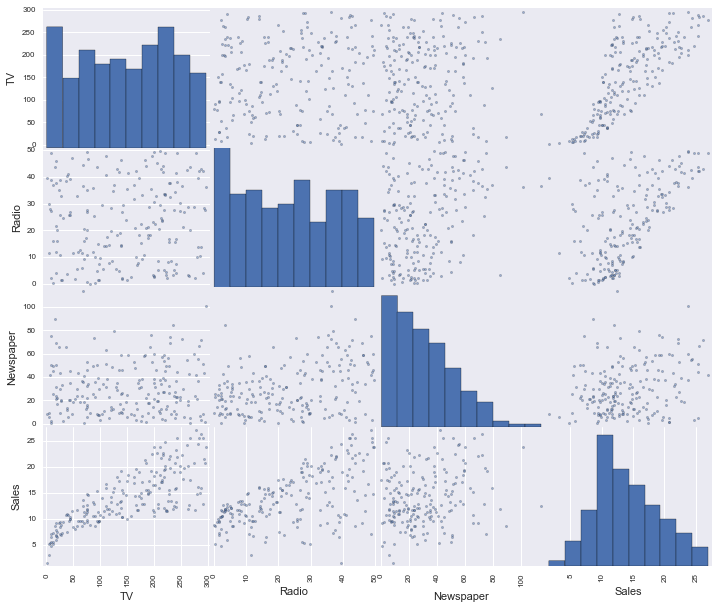

In [5]:
pd.scatter_matrix(data, figsize=(12, 10));

### 2.1.3 box plot in Pandas

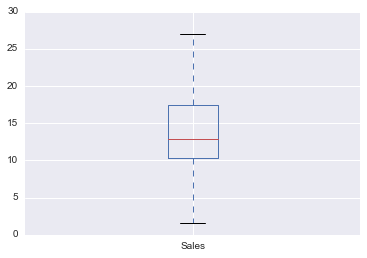

In [6]:
data.boxplot(column='Sales',return_type='axes');

### 2.1.4 line plot in Pandas

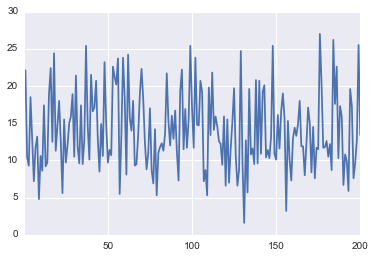

In [7]:
data.Sales.plot();

## 2.2 Plots in Seaborn

### 2.2.1 scatter plot in Seaborn

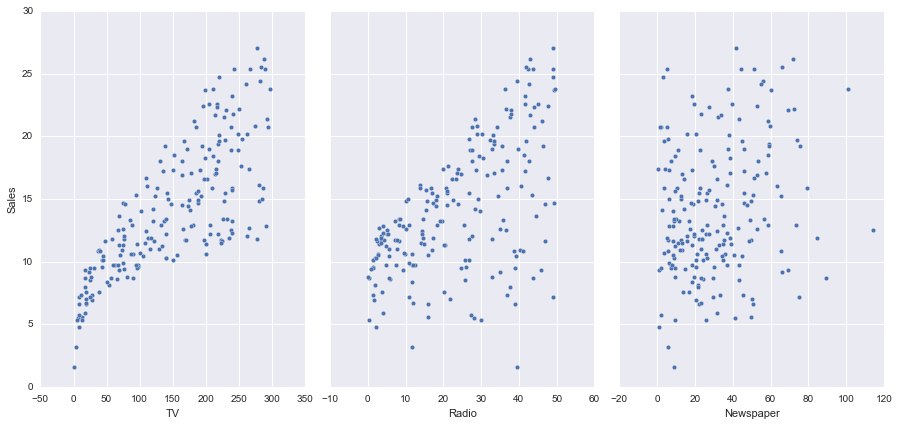

In [8]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=6, aspect=0.7);

### 2.2.2 scatter plot in Seaborn, include a "regression line"

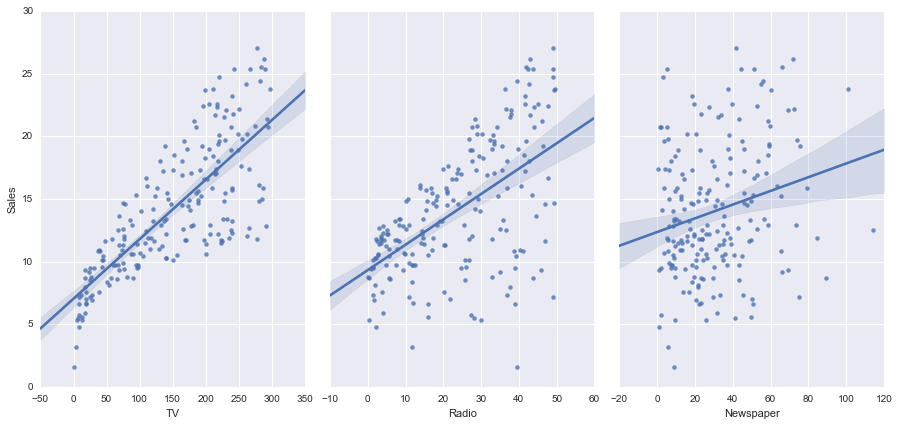

In [9]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=6, aspect=0.7, kind='reg');

### 2.2.3 scatter matrix in Seaborn 

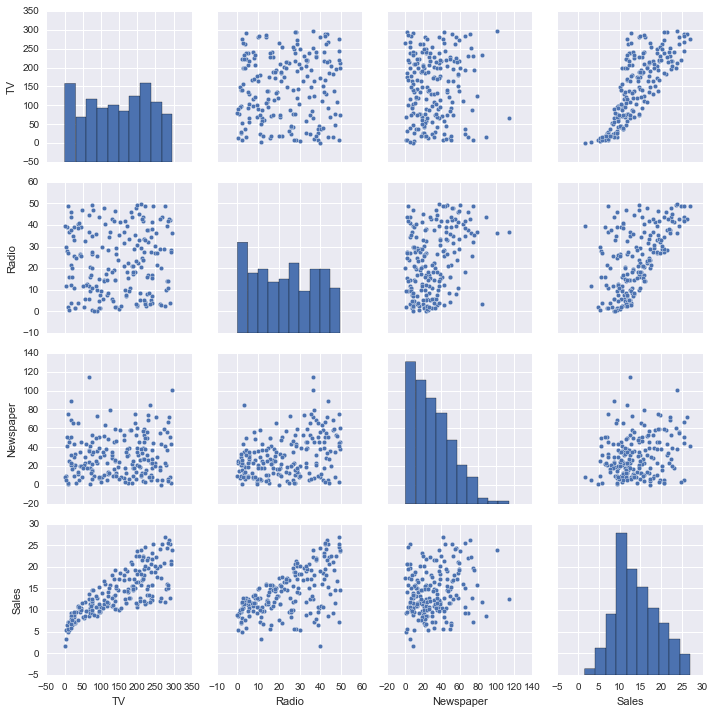

In [10]:
sns.pairplot(data);

### 2.2.4 display correlation matrix in Seaborn using a heatmap

In [11]:
# compute correlation matrix
cor = data.corr()

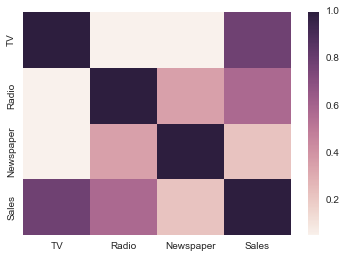

In [12]:
sns.heatmap(cor);

# 3. Questions About the Advertising Data

On the basis of this data, how should we spend our advertising money in the future?    

This general question might lead you to more specific questions:    

- Is there a relationship between ads and sales?    
- How strong is that relationship?     
- Which ad types contribute to sales?      
- What is the effect of each ad type of sales?       
- Given ad spending in a particular market, can sales be predicted?      

# 4. Linear Regression in Statsmodels 

## 4.1 Build model

In [13]:
# create a fitted model in one line
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

## 4.2 Interpreting Model Coefficients

- A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.     
Or more clearly:        
- An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets.     

## 4.3 Using the Model for Prediction

In [14]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [15]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([ 9.40942557])

## 4.4 Plotting the Least Squares Line

In [16]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [17]:
# make predictions for those x values and store them
preds = lm.predict(X_new)

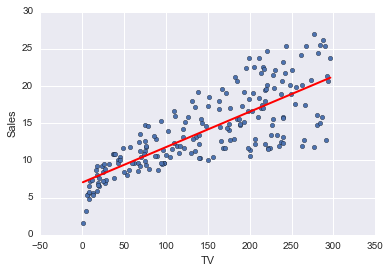

In [18]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')
# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2);

## 4.5 Confidence in the Model

Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was sampled 100 times, approximately 95 of those confidence intervals would contain the "true" coefficient.

In [19]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


## 4.6 Hypothesis Testing and p-values

- null hypothesis: There is no relationship between TV ads and Sales (and thus $\beta_{1}$ equals zero)
- alternative hypothesis: There is a relationship between TV ads and Sales (and thus $\beta_{1}$ is not equal to zero)

In [20]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

- In this case, the p-value for TV is far less than 0.05, and so we believe that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.   

## 4.7 How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the R-squared value. **R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model**, or the reduction in error over the null model. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

In [21]:
# print the R-squared value for the model
lm.rsquared

0.61187505085007099

# 5. Multiple Linear Regression in Statsmodels

## 5.1 create a fitted model with all three features

In [22]:
lm2 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
# print the coefficients
lm2.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

## 5.2 How do we interpret these coefficients? 

For a given amount of Radio and Newspaper ad spending, an increase of $1000 in TV ad spending is associated with an increase in Sales of 45.765 widgets.

## 5.3 Print a summary of the fitted model

In [23]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 22 Jul 2016   Prob (F-statistic):           1.58e-96
Time:                        17:09:45   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?      

- TV and Radio have significant p-values, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.     
- TV and Radio ad spending are both positively associated with Sales, whereas Newspaper ad spending is slightly negatively associated with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)      
- This model has a higher R-squared (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.   

## 5.4 Feature Selection

How do I decide which features to include in a linear model?      

Here's one idea:        

- Try different models, and only keep predictors in the model if they have small p-values.       
- Check whether the R-squared value goes up when you add new predictors.   

What are the drawbacks to this approach?       

- Linear models rely upon a lot of assumptions (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.       
- Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are pure noise, 5 of them (on average) will still be counted as significant.        
- R-squared is susceptible to overfitting, and thus there is no guarantee that a model with a high R-squared value will generalize.           

In [24]:
# only include TV and Radio in the model
lm3 = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm3.rsquared

0.89719426108289568

In [25]:
lm2.rsquared

0.89721063817895219

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.   

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but it generally under-penalizes complexity.       

So is there a better approach to feature selection?      

**Cross-validation**. It provides a more reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best generalize to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models.    

Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.       

## 5.5 Model Evaluation Metrics for Regression

For classification problems, we have only used classification accuracy as our evaluation metric. What metrics can we used for regression problems?    

- Mean Absolute Error (MAE) is the mean of the absolute value of the errors:    

$$MAE = \frac{1}{n}\sum_{1}^n |y_{i} - \bar{y_{i}}|$$

- Mean Squared Error (MSE) is the mean of the squared errors:   

$$MSE = \frac{1}{n}\sum_{1}^n (y_{i} - \bar{y_{i}})^2$$

- Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:  

$$RMSE = \sqrt{\frac{1}{n}\sum_{1}^n (y_{i} - \bar{y_{i}})^2}$$


- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

**All of these are loss functions, because we want to minimize them.**   

Let's calculate these by hand, to get an intuitive sense for the results:   

In [26]:
# define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]

# calculate MAE, MSE, RMSE
print metrics.mean_absolute_error(y_true, y_pred)
print metrics.mean_squared_error(y_true, y_pred)
print np.sqrt(metrics.mean_squared_error(y_true, y_pred))

10.0
150.0
12.2474487139


In [27]:
# RMSE of models
rmse1 = np.sqrt(metrics.mean_squared_error(data.Sales, lm.predict()))
rmse2 = np.sqrt(metrics.mean_squared_error(data.Sales, lm2.predict()))
rmse3 = np.sqrt(metrics.mean_squared_error(data.Sales, lm3.predict()))
print("RSME of three models\nRSME1 = {:.3F}\nRSME2 = {:.3f}\nRSME3 = {:.3f}".format(rmse1,rmse2,rmse3))

RSME of three models
RSME1 = 3.242
RSME2 = 1.669
RSME3 = 1.669


## 5.6 Model Evaluation Using Train/Test Split (or cross-validation)

A better approach to feature selection!   

- They attempt to directly estimate how well your model will generalize to out-of-sample data.  
- They rely on fewer assumptions that linear regression.   
- They can easily be applied to any model, not just linear models.   

Let's use train/test split with RMSE to see whether Newspaper should be kept in the model:

### 5.6.1 include Newspaper

In [28]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# default: 25% test, 75% train
lm_s1 = LinearRegression()
lm_s1.fit(X_train, y_train)
y_pred = lm_s1.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.40465142303


### 5.6.2 exclude Newspaper

In [29]:
X = data[['TV', 'Radio']]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm_s2 = LinearRegression()
lm_s2.fit(X_train, y_train)
y_pred = lm_s2.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.38790346994


# 6. Linear Regression in scikit-learn

## 6.1 Multiple Linear Regression

In [30]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

In [31]:
lm4 = LinearRegression()
lm4.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
# print intercept and coefficients
print lm4.intercept_
print lm4.coef_

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]


In [33]:
# pair the feature names with the coefficients
zip(feature_cols, lm4.coef_)

[('TV', 0.045764645455397608),
 ('Radio', 0.18853001691820462),
 ('Newspaper', -0.0010374930424762972)]

In [34]:
# predict for a new observation
x_test = np.asarray([100, 25, 25])
lm4.predict(x_test.reshape(1, -1))

array([ 12.20266701])

In [35]:
# calculate the R-squared
lm4.score(X, y)

0.89721063817895208

**Note that p-values and confidence intervals are not (easily) accessible through scikit-learn.**

# 7. Handling Categorical Predictors

## 7.1 Handling Categorical Predictors with Two Categories

Up to now, all of our predictors have been numeric. What if one of our predictors was categorical?           

Let's create a new feature called **Size**, and randomly assign observations to be **small** or **large**.    

In [36]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


### 7.1.1 Handling Categorical Predictors with Two Categories - sklearn

**For scikit-learn, we need to represent all data numerically. If the feature only has two categories, we can simply create a dummy variable that represents the categories as a binary value.**

In [37]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [38]:
# create X and y
feature_cols2 = ['TV', 'Radio', 'Newspaper', 'IsLarge']
X2 = data[feature_cols2]
y2 = data.Sales

# instantiate, fit
lm5 = LinearRegression()
lm5.fit(X2, y2)

# print coefficients
zip(feature_cols2, lm5.coef_)

[('TV', 0.045719820924362775),
 ('Radio', 0.18872814313427869),
 ('Newspaper', -0.0010976794483516079),
 ('IsLarge', 0.0574238508548277)]

**How do we interpret the IsLarge coefficient?**  

For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average increase in Sales of 57.42 widgets (as compared to a Small market, which is called the baseline level).     

**What if we had reversed the 0/1 coding and created the feature 'IsSmall' instead?**   

The coefficient would be the same, except it would be negative instead of positive. As such, your choice of category for the baseline does not matter, all that changes is your interpretation of the coefficient.      

### 7.1.2 Handling Categorical Predictors with Two Categories - statsmodels

In [39]:
lm6 = smf.ols(formula='Sales ~ TV + Radio + Newspaper + Size', data=data).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     425.7
Date:                Fri, 22 Jul 2016   Prob (F-statistic):           3.98e-95
Time:                        17:09:45   Log-Likelihood:                -386.15
No. Observations:                 200   AIC:                             782.3
Df Residuals:                     195   BIC:                             798.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         2.9691      0.338      8.789      0.000         2.303     3.635
Size[T.small]    -0.0574      0.243     -0.236      0.813        -0.537     0.422
TV                0.0457      0.001     32.401      0.000         0.043     0.049
Radio             0.1887      0.009     21.761      0.000         0.172     0.206
Newspaper        -0.0011      0.006     -0.186      0.852        -0.013     0.011
==============================================================================
Omnibus:                       60.126   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.842
Skew:                          -1.323   Prob(JB):                     2.90e-33
Kurtosis:                       6.314   Cond. No.                         520.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Internally, statsmodels uses the **patsy** package to convert formulas and data to the matrices that are used in model fitting. The formula framework is quite powerful.   

Looking at the summary printed above, notice that **patsy** determined that elements of *Size* were **text strings**, so **it treated Size as a categorical variable**. patsy‘s default is also to include an intercept, so we **automatically dropped one of the Size categories**.

If **Size** had been an **integer variable** that we wanted to **treat explicitly as categorical**, we could have done so by **using the C() operator**.

In [40]:
lm7 = smf.ols(formula='Sales ~ TV + Radio + Newspaper + C(IsLarge)', data=data).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     425.7
Date:                Fri, 22 Jul 2016   Prob (F-statistic):           3.98e-95
Time:                        17:09:45   Log-Likelihood:                -386.15
No. Observations:                 200   AIC:                             782.3
Df Residuals:                     195   BIC:                             798.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           2.9117      0.333      8.740      0.000         2.255     3.569
C(IsLarge)[T.1]     0.0574      0.243      0.236      0.813        -0.422     0.537
TV                  0.0457      0.001     32.401      0.000         0.043     0.049
Radio               0.1887      0.009     21.761      0.000         0.172     0.206
Newspaper          -0.0011      0.006     -0.186      0.852        -0.013     0.011
==============================================================================
Omnibus:                       60.126   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.842
Skew:                          -1.323   Prob(JB):                     2.90e-33
Kurtosis:                       6.314   Cond. No.                         510.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Note:**  

- coef of 'Size[T.small]' in **lm6** is **-0.0574**.  

For a given amount of TV/Radio/Newspaper ad spending, being a **small market** is associated with an average **decrease** in Sales of 57.42 widgets (as compared to a large market, which is called the baseline level).   

- coef of 'C(IsLarge)[T.1]' in **lm7** is **0.0574**.    

For a given amount of TV/Radio/Newspaper ad spending, being a **large market** is associated with an average **increase** in Sales of 57.42 widgets (as compared to a Small market, which is called the baseline level).

They means the same thing!

**Change the baseline**

In [41]:
myTreatment = Treatment('small') # set 'small' as baseline. (default set 'large' as baseline)
lm8 = smf.ols(formula='Sales ~ TV + Radio + Newspaper + C(Size,myTreatment)', data=data).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     425.7
Date:                Fri, 22 Jul 2016   Prob (F-statistic):           3.98e-95
Time:                        17:09:46   Log-Likelihood:                -386.15
No. Observations:                 200   AIC:                             782.3
Df Residuals:                     195   BIC:                             798.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
Intercept                         2.9117      0.333      8.740      0.000         2.255     3.569
C(Size, myTreatment)[T.large]     0.0574      0.243      0.236      0.813        -0.422     0.537
TV                                0.0457      0.001     32.401      0.000         0.043     0.049
Radio                             0.1887      0.009     21.761      0.000         0.172     0.206
Newspaper                        -0.0011      0.006     -0.186      0.852        -0.013     0.011
==============================================================================
Omnibus:                       60.126   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.842
Skew:                          -1.323   Prob(JB):                     2.90e-33
Kurtosis:                       6.314   Cond. No.                         510.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 7.2 Handling Categorical Predictors with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**.

In [42]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums >= 0.66
# # initially set Area to rural
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


### 7.2.1 Handling Categorical Predictors with More than Two Categories - sklearn

**We have to represent Area numerically, but we can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an ordered relationship between suburban and urban (and thus urban is somehow "twice" the suburban category).**       

Instead, we create another dummy variable   

In [43]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0.0,0.0
2,44.5,39.3,45.1,10.4,small,0,urban,0.0,1.0
3,17.2,45.9,69.3,9.3,small,0,rural,0.0,0.0
4,151.5,41.3,58.5,18.5,small,0,urban,0.0,1.0
5,180.8,10.8,58.4,12.9,large,1,suburban,1.0,0.0


Here is how we interpret the coding:     

- rural is coded as Area_suburban=0 and Area_urban=0     
- suburban is coded as Area_suburban=1 and Area_urban=0     
- urban is coded as Area_suburban=0 and Area_urban=1   

Why do we only need two dummy variables, not three?      

Because two dummies captures all of the information about the Area feature, and **implicitly defines rural as the baseline level**. (**In general, if you have a categorical feature with k levels, you create k-1 dummy variables.**)   

In [44]:
# create X and y
feature_cols3 = ['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']
X3 = data[feature_cols3]
y3 = data.Sales

# instantiate, fit
lm9 = LinearRegression()
lm9.fit(X3, y3)

# print coefficients
zip(feature_cols3, lm9.coef_)

[('TV', 0.045744010363313749),
 ('Radio', 0.18786669552525811),
 ('Newspaper', -0.0010876977267108138),
 ('IsLarge', 0.077396607497479092),
 ('Area_suburban', -0.10656299015958638),
 ('Area_urban', 0.26813802165220063)]

**How do we interpret the coefficients?**     

- Holding all other variables fixed, being a suburban area is associated with an average decrease in Sales of 106.56 widgets (as compared to the baseline level, which is rural).     

- Being an urban area is associated with an average increase in Sales of 268.13 widgets (as compared to rural).   

**A final note about dummy encoding: If you have categories that can be ranked (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can potentially use a single dummy variable and represent the categories numerically (such as 1, 2, 3, 4, 5).**

### 7.2.2 Handling Categorical Predictors with More than Two Categories - statsmodel

In [45]:
myTreatment = Treatment('small') # set 'small' as baseline. (default set 'large' as baseline)
lm10 = smf.ols(formula='Sales ~ TV + Radio + Newspaper + C(Size,myTreatment) + Area', data=data).fit()
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     283.7
Date:                Fri, 22 Jul 2016   Prob (F-statistic):           7.12e-93
Time:                        17:09:46   Log-Likelihood:                -385.25
No. Observations:                 200   AIC:                             784.5
Df Residuals:                     193   BIC:                             807.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
Intercept                         2.8742      0.396      7.257      0.000         2.093     3.655
C(Size, myTreatment)[T.large]     0.0774      0.246      0.314      0.754        -0.408     0.563
Area[T.suburban]                 -0.1066      0.294     -0.362      0.718        -0.687     0.474
Area[T.urban]                     0.2681      0.311      0.864      0.389        -0.344     0.881
TV                                0.0457      0.001     32.394      0.000         0.043     0.049
Radio                             0.1879      0.009     21.587      0.000         0.171     0.205
Newspaper                        -0.0011      0.006     -0.184      0.854        -0.013     0.011
==============================================================================
Omnibus:                       63.313   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.951
Skew:                          -1.358   Prob(JB):                     7.56e-38
Kurtosis:                       6.625   Cond. No.                         707.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note: Area (rural, suburban, urban): rural is the baseline by default.

Another way to do it.

In [46]:
lm11 = smf.ols(formula='Sales ~ TV + Radio + Newspaper + \
        C(IsLarge) + C(Area_suburban) + C(Area_urban)', data=data).fit()
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     283.7
Date:                Fri, 22 Jul 2016   Prob (F-statistic):           7.12e-93
Time:                        17:09:46   Log-Likelihood:                -385.25
No. Observations:                 200   AIC:                             784.5
Df Residuals:                     193   BIC:                             807.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                   2.8742      0.396      7.257      0.000         2.093     3.655
C(IsLarge)[T.1]             0.0774      0.246      0.314      0.754        -0.408     0.563
C(Area_suburban)[T.1.0]    -0.1066      0.294     -0.362      0.718        -0.687     0.474
C(Area_urban)[T.1.0]        0.2681      0.311      0.864      0.389        -0.344     0.881
TV                          0.0457      0.001     32.394      0.000         0.043     0.049
Radio                       0.1879      0.009     21.587      0.000         0.171     0.205
Newspaper                  -0.0011      0.006     -0.184      0.854        -0.013     0.011
==============================================================================
Omnibus:                       63.313   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.951
Skew:                          -1.358   Prob(JB):                     7.56e-38
Kurtosis:                       6.625   Cond. No.                         707.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 8. Takeaways

**statsmodels** allows users to fit statistical models using R-style formulas, and allow **text string** categorical variables (For scikit-learn, we need to represent all data numerically. ). **summary** fuction of a model in **statsmodels** is also very convinient.